## ML implementation    

In [38]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sqlite3 import Error
from sklearn.ensemble import RandomForestClassifier
import sqlite3
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bjornbremholm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [134]:
df_proc_3 = pd.read_csv('Twitter_Processed3.csv')
df_proc_2 = pd.read_csv('Twitter_Processed2.csv')
df_names3 = pd.read_csv('Name_id_list3.csv')
df_names2 = pd.read_csv('Name_id_list2.csv')

In [135]:
df_proc_3[df_proc_3['Language'] == 'da' ]
df_proc_3['Tweet Processed']

# df_names

0        ['opgør', 'ekstremt', 'kønsopdelte', 'uddannel...
1        ['undrer', 'ministeren', 'deltog', '#ligestill...
2                                                       []
3        ['gerne', 'mere', 'ledelse', 'gerne', 'mindre'...
4        ['takker', 'stærke', 'kvinder', 'mænd', 'kæmpe...
                               ...                        
22864    ['pendler', 'gerne', 'god', 'arbejdsplads', 't...
22865    ['god', 'brølt', 'amalie', 'lyhne', 'politiker...
22866    ['østrig', 'flygtningekaos', 'skaber', 'opdelt...
22867    ['mon', 'hold', 'truslen', 'df', 'agt', 'magt'...
22868    ['sikrer', 'karakterer', 'social', 'mobilitet'...
Name: Tweet Processed, Length: 22869, dtype: object

In [137]:
fatma_tweets = df_proc_3[df_proc_3['Name'] == 'Fatma Øktem']
fatma_info = df_names3[df_names3['Name'] == 'Fatma Øktem']
fatma_tweets

,Unnamed: 0,Date,Name,Tweet Processed,Language
0,0,2021-05-12 08:10:27,Fatma Øktem,"['opgør', 'ekstremt', 'kønsopdelte', 'uddannel...",da
1,1,2021-04-30 20:36:54,Fatma Øktem,"['undrer', 'ministeren', 'deltog', '#ligestill...",da
2,2,2021-04-30 20:30:43,Fatma Øktem,[],und
3,3,2021-03-27 16:10:20,Fatma Øktem,"['gerne', 'mere', 'ledelse', 'gerne', 'mindre'...",da
4,4,2021-03-08 09:21:24,Fatma Øktem,"['takker', 'stærke', 'kvinder', 'mænd', 'kæmpe...",da
...,...,...,...,...,...
571,571,2011-01-25 22:41:33,Fatma Øktem,"['tilfreds', 'regeringens', 'tilbagetrækningsr...",da
572,572,2011-01-25 15:35:25,Fatma Øktem,"['sidder', 'regionen', 'budgetseminar', 'komme...",da
573,573,2009-10-28 00:13:05,Fatma Øktem,"['tvdebat', 'omkring', 'regionspolitk', 'glad'...",da
574,574,2009-10-21 12:20:40,Fatma Øktem,"['kaotisk', 'dag', 'gerne', 'bytte', 'ny']",da


In [130]:
# merging tweets on persons
def merge_df(df_name,df_twitter):
    # Merge on names
    df_new = pd.merge(df_name,df_twitter[['Date','Name', 'Tweet Processed', 'Language']],  how='left', on=['Name'])
    
    # df_new['Twitter_id'] = df_new['Twitter_id'].fillna(df_new1['Twitter_id'])
    # df_new['Følgere'] = df_new['Følgere'].fillna(df_new1['Følgere'])

    # We will still miss a few Twitter_id (human error or no twitter account)
    # df_new.replace(float('NaN'),'None',inplace=True)

    return df_new



In [138]:
# df_info = merge_df(df_Name,df_Twitter_id)
# twitter_missing = len(df_info.loc[df_info['Twitter_id'] == 'None'])
# print ('We are missing: '+ str(twitter_missing) + ' twitter accounts')
df_fatma = merge_df(fatma_info, fatma_tweets)
# df_fatma

df_test = merge_df(df_names3, df_proc_3)
df_test2 = merge_df(df_names2, df_proc_2)

df_model = pd.concat([df_test2, df_test])
df_model.reset_index(inplace=True)
df_model = df_model.drop(['index', 'Unnamed: 0'], axis=1)
df_model['final_text'] = np.nan
for i in range(len(df_model['Tweet Processed'])):
    df_model['final_text'][i] = df_model['Tweet Processed'][i]
df_model['Tweet Processed'][0]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


"['eklatant', 'løftebrud', 'regeringen', 'socialdemokraterne', 'gå', 'hårdt', 'langeland', 'stoppes']"

In [ ]:
# Har vi husket alle disse?

# nltk.download('stopwords')
# stemmer = PorterStemmer()
# words = stopwords.words("english")
# dataset['cleaned'] = dataset['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

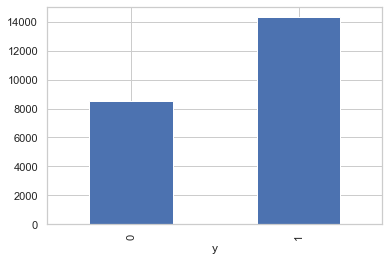

In [61]:
# df_test.groupby('y').mean()

df_test.groupby('y')['Tweet Processed'].count().plot.bar(ylim=0)
plt.show()

In [67]:
df_test_da = df_test[df_test['Language'] != 'en']
df_test_da

(21532, 21530)

In [47]:
vectorizer = TfidfVectorizer(min_df= 3, sublinear_tf=True, norm='l1', ngram_range=(1, 2) )#, max_features=10000)
final_features = vectorizer.fit_transform(X)
final_features.shape

(97975, 88782)

In [48]:
from sklearn.linear_model import LogisticRegression

# X = df_test_da['Tweet Processed'] 
# Y = df_test_da['y']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', LogisticRegression(random_state=1, penalty='l1', solver='liblinear'))])

model = pipeline.fit(X_train, y_train)
with open('LogisticRegression.pickle', 'wb') as f:
    pickle.dump(model, f)

ytest = np.array(y_test)

# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.84      0.75     13927
           1       0.69      0.45      0.55     10567

    accuracy                           0.68     24494
   macro avg       0.68      0.65      0.65     24494
weighted avg       0.68      0.68      0.66     24494

[[11752  2175]
 [ 5770  4797]]


In [13]:
import pandas as pd
import numpy as np
import re
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
# from tqdm import tqdm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


# Text analysis
import nltk # NLTK: A basic, popular NLP package. 

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [127]:
twitter_proc = pd.read_csv('Twitter_data_Final.csv')
info = pd.read_csv('Name_id_Final.csv')

def preprocess(text):
    # lemmas = text.lower()
    text = re.sub('https:[\s\S]*$','', text) # remove links
    text = re.sub('[0-9]','', text) # remove links
    text = re.sub(r'[^\w\#\s]','', text) # should we leave hashtag or not

    tokens = nltk.TweetTokenizer().tokenize(text.lower())

    # tokens = nltk.word_tokenize(text.lower())
    # wnl = nltk.WordNetLemmatizer()
    # lemmas = [wnl.lemmatize(t) for t in tokens]

    stop_words_list = nltk.corpus.stopwords.words("danish")
    lemmas = [i for i in tokens if i not in stop_words_list]

    return lemmas # return a list of stems/lemmas


def process_tweets_text(df):

    tweet_process = []


    for i in range(len(df['Tweet'])):
        text = df['Tweet'][i]

        tweet_process.append([df['Date'][i],df['Name'][i],preprocess(text),df['Language'][i]])

    df_out = pd.DataFrame(tweet_process, columns=['Date','Name','Tweet Processed','Language'])
    
    return df_out


df_tweet_processed = process_tweets_text(twitter_proc)




In [ ]:
# dataset['cleaned'] = dataset['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())



In [128]:
df_main = pd.merge(info,df_tweet_processed[['Date','Name', 'Tweet Processed', 'Language', 'final_text']],  how='left', on=['Name'])
# df_main
df_main = df_main[df_main['Language'] == 'da']

X = df_main['final_text'] 
Y = df_main['y']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

KeyError: "['final_text'] not in index"

In [123]:
vect = CountVectorizer(ngram_range=(1,1), max_features=1000)
X = vect.fit_transform(X_train)
X_test = vect.fit_transform(X_test)

In [124]:
vect.get_feature_names()

['10',
 '100',
 '1000',
 '11',
 '12',
 '13',
 '14',
 '15',
 '18',
 '19',
 '1995',
 '20',
 '2015',
 '2019',
 '2020',
 '2030',
 '24syv',
 '25',
 '30',
 '40',
 '50',
 '70',
 'aalborg',
 'aarhus',
 'adgang',
 'afgifter',
 'afgørende',
 'afskaffe',
 'afstand',
 'aftale',
 'aftalen',
 'aften',
 'al',
 'aldrig',
 'alene',
 'allerede',
 'alligevel',
 'alternativet',
 'altid',
 'altså',
 'alvor',
 'alvorlig',
 'alvorligt',
 'amp',
 'anbefalinger',
 'andet',
 'andre',
 'angreb',
 'ansatte',
 'ansvar',
 'antallet',
 'arbejde',
 'arbejder',
 'arbejdet',
 'arbejdsmarkedet',
 'arbejdspladser',
 'artikel',
 'bag',
 'baggrund',
 'bakker',
 'bank',
 'bare',
 'barn',
 'bedre',
 'bedst',
 'bedste',
 'befolkningen',
 'begge',
 'begynder',
 'behandling',
 'behov',
 'bekymrende',
 'bekæmpe',
 'berlingske',
 'beslutning',
 'beslutninger',
 'besparelser',
 'bestemme',
 'besøg',
 'betale',
 'betaler',
 'betyder',
 'bhvchat',
 'bidrage',
 'biler',
 'billede',
 'billigere',
 'bla',
 'blandt',
 'blevet',
 'blok',

In [125]:
# vect = CountVectorizer(ngram_range=(1,1))
# X = vect.fit_transform(X_train)
penalty = 'l1'

mlogit = LogisticRegression(random_state=1, penalty=penalty, solver='liblinear').fit(X, y_train)

In [126]:
y_pred = mlogit.predict(X_test)

a = y_test == y_pred

a.mean()

0.5167216684244548

In [73]:
# model = pipeline.fit(X_train, y_train)
# with open('LogisticRegression.pickle', 'wb') as f:
#     pickle.dump(model, f)

ytest = np.array(y_test)

# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.86      0.75     16560
           1       0.71      0.45      0.55     12833

    accuracy                           0.68     29393
   macro avg       0.69      0.65      0.65     29393
weighted avg       0.69      0.68      0.66     29393

[[14234  2326]
 [ 7066  5767]]


In [57]:
# print(X.toarray())
vect.get_feature_names()

['00',
 '0000',
 '00000500',
 '0001',
 '0005',
 '000kr',
 '001',
 '002',
 '003252',
 '007',
 '00erne',
 '00ernes',
 '00ry',
 '00vt',
 '00vxpe8o7',
 '01',
 '01122016',
 '012',
 '0142',
 '015qhthn',
 '018',
 '01auiaw',
 '01e0kdvl',
 '01m3b2evg',
 '01ndh',
 '01pyi',
 '01rgwnvaqy',
 '01u0fem7',
 '01ucix6z',
 '01vshqb',
 '01vt8hwqu4',
 '02',
 '0200',
 '024cmgfej',
 '0291cwae0',
 '02bwbt',
 '02g7',
 '02mc',
 '02årige',
 '03',
 '0308',
 '033',
 '0330',
 '039',
 '0390',
 '039vi',
 '03aelbnz',
 '03btaeie15',
 '03hlu3',
 '03j6udx9gh',
 '03kbnh',
 '03p',
 '03pequ25o',
 '03wbr9',
 '03wy3fj',
 '04',
 '0406',
 '040eskhkz',
 '0415',
 '049pn5l2',
 '04x',
 '04xw',
 '05',
 '0507',
 '055',
 '059',
 '05bqoeq',
 '05dz',
 '05miotons',
 '05tk0ykpj',
 '05årige',
 '06',
 '0630',
 '0645',
 '065',
 '065s',
 '06bhna4h3',
 '06d0m7ri1',
 '06lw',
 '06r5p',
 '07',
 '0715',
 '071qqan1ck',
 '0720',
 '0730',
 '0745',
 '074a',
 '075',
 '0759lørdagmorgenegnettophistorie',
 '07iznljlr',
 '07jj4t',
 '07mio',
 '07ml',
 '07sz